In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['superstore_dataset2011-2015.csv']


In [2]:
import matplotlib.pyplot as plt 
import seaborn as sns

In [3]:
os.chdir("../input")
os.listdir()

['superstore_dataset2011-2015.csv']

In [4]:
df = pd.read_csv("superstore_dataset2011-2015.csv", encoding = "ISO-8859-1")
df.shape

(51290, 24)

In [5]:
df.head(10)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,Country,Postal Code,Market,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
0,42433,AG-2011-2040,1/1/2011,6/1/2011,Standard Class,TB-11280,Toby Braunhardt,Consumer,Constantine,Constantine,Algeria,NaN,Africa,Africa,OFF-TEN-10000025,Office Supplies,Storage,"Tenex Lockers, Blue",408.300,2,0.00,106.1400,35.46,Medium
1,22253,IN-2011-47883,1/1/2011,8/1/2011,Standard Class,JH-15985,Joseph Holt,Consumer,Wagga Wagga,New South Wales,Australia,NaN,APAC,Oceania,OFF-SU-10000618,Office Supplies,Supplies,"Acme Trimmer, High Speed",120.366,3,0.10,36.0360,9.72,Medium
2,48883,HU-2011-1220,1/1/2011,5/1/2011,Second Class,AT-735,Annie Thurman,Consumer,Budapest,Budapest,Hungary,NaN,EMEA,EMEA,OFF-TEN-10001585,Office Supplies,Storage,"Tenex Box, Single Width",66.120,4,0.00,29.6400,8.17,High
3,11731,IT-2011-3647632,1/1/2011,5/1/2011,Second Class,EM-14140,Eugene Moren,Home Office,Stockholm,Stockholm,Sweden,NaN,EU,North,OFF-PA-10001492,Office Supplies,Paper,"Enermax Note Cards, Premium",44.865,3,0.50,-26.0550,4.82,High
4,22255,IN-2011-47883,1/1/2011,8/1/2011,Standard Class,JH-15985,Joseph Holt,Consumer,Wagga Wagga,New South Wales,Australia,NaN,APAC,Oceania,FUR-FU-10003447,Furniture,Furnishings,"Eldon Light Bulb, Duo Pack",113.670,5,0.10,37.7700,4.70,Medium
5,22254,IN-2011-47883,1/1/2011,8/1/2011,Standard Class,JH-15985,Joseph Holt,Consumer,Wagga Wagga,New South Wales,Australia,NaN,APAC,Oceania,OFF-PA-10001968,Office Supplies,Paper,"Eaton Computer Printout Paper, 8.5 x 11",55.242,2,0.10,15.3420,1.80,Medium
6,21613,IN-2011-30733,1/2/2011,3/2/2011,Second Class,PO-18865,Patrick O'Donnell,Consumer,Dhaka,Dhaka,Bangladesh,NaN,APAC,Central Asia,TEC-CO-10002316,Technology,Copiers,"Brother Personal Copier, Laser",285.780,2,0.00,71.4000,57.30,Critical
7,34662,CA-2011-115161,1/2/2011,3/2/2011,First Class,LC-17050,Liz Carlisle,Consumer,Mission Viejo,California,United States,92691.0,US,West,FUR-BO-10003966,Furniture,Bookcases,"Sauder Facets Collection Library, Sky Alder Fi...",290.666,2,0.15,3.4196,54.64,High
8,44508,AO-2011-1390,1/2/2011,4/2/2011,Second Class,DK-3150,David Kendrick,Corporate,Luanda,Luanda,Angola,NaN,Africa,Africa,OFF-FEL-10001541,Office Supplies,Storage,"Fellowes Lockers, Wire Frame",206.400,1,0.00,92.8800,53.08,Critical
9,23688,ID-2011-56493,1/2/2011,3/2/2011,Second Class,SP-20650,Stephanie Phelps,Corporate,Yingcheng,Hubei,China,NaN,APAC,North Asia,OFF-ST-10002161,Office Supplies,Storage,"Tenex Trays, Single Width",162.720,3,0.00,68.3100,44.36,Critical


In [6]:
df.shape[0]

51290

In [7]:
df.shape[1]

24

In [8]:
df.columns.values

array(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'City', 'State',
       'Country', 'Postal Code', 'Market', 'Region', 'Product ID',
       'Category', 'Sub-Category', 'Product Name', 'Sales', 'Quantity',
       'Discount', 'Profit', 'Shipping Cost', 'Order Priority'],
      dtype=object)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 24 columns):
Row ID            51290 non-null int64
Order ID          51290 non-null object
Order Date        51290 non-null object
Ship Date         51290 non-null object
Ship Mode         51290 non-null object
Customer ID       51290 non-null object
Customer Name     51290 non-null object
Segment           51290 non-null object
City              51290 non-null object
State             51290 non-null object
Country           51290 non-null object
Postal Code       9994 non-null float64
Market            51290 non-null object
Region            51290 non-null object
Product ID        51290 non-null object
Category          51290 non-null object
Sub-Category      51290 non-null object
Product Name      51290 non-null object
Sales             51290 non-null float64
Quantity          51290 non-null int64
Discount          51290 non-null float64
Profit            51290 non-null float64
Shipping C

In [10]:
# 1. Who are the top-20 most profitable customers. Show them through plots.

top20 = df.groupby(["Customer Name"])['Profit'].aggregate(np.sum).reset_index().sort_values('Profit',ascending = False).head(20)
top20

,Customer Name,Profit
731,Tamara Chand,8672.89890
623,Raymond Buch,8453.04950
672,Sanjit Chand,8205.37990
335,Hunter Lopez,7816.56778
88,Bill Eplett,7410.00530
323,Harry Marie,6958.28640
727,Susan Pistek,6484.40726
542,Mike Gockenbach,6458.67620
6,Adrian Barton,6417.28450
758,Tom Ashbrook,6311.97910


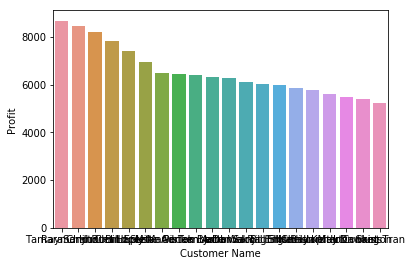

In [11]:
sns.barplot(x="Customer Name", y="Profit", data = top20)

In [12]:
figsize = plt.figure(figsize = (5,5))

<Figure size 360x360 with 0 Axes>

In [13]:
ax1 = figsize.add_subplot(111)
sns.countplot(x = "Customer Name",
            data = top20,
            ax = ax1
             )

In [14]:
ax1.set_title("Count plot")

Text(0.5, 1.0, 'Count plot')

In [15]:
ax1.set_xlabel("CustomerNames")

Text(0.5, 0, 'CustomerNames')

In [16]:
plt.show()

In [17]:
# Key Observations
# Top 3 customers who has maximum profits are in the order of Tamara Chand, Raymond Buch and Sanjit Chand

In [18]:
# 2. What is the distribution of our customer segment
segcnt = df['Segment'].value_counts().index
segcnt

Index(['Consumer', 'Corporate', 'Home Office'], dtype='object')

In [19]:
df.Segment.value_counts()

Consumer       26518
Corporate      15429
Home Office     9343
Name: Segment, dtype: int64

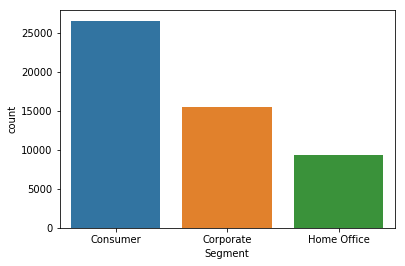

In [20]:
sns.countplot("Segment", data=df, order = segcnt)

In [21]:
# 3. Who are our top-20 oldest customers
df.dtypes

Row ID              int64
Order ID           object
Order Date         object
Ship Date          object
Ship Mode          object
Customer ID        object
Customer Name      object
Segment            object
City               object
State              object
Country            object
Postal Code       float64
Market             object
Region             object
Product ID         object
Category           object
Sub-Category       object
Product Name       object
Sales             float64
Quantity            int64
Discount          float64
Profit            float64
Shipping Cost     float64
Order Priority     object
dtype: object

In [22]:
df['OrdDt'] = pd.to_datetime(df['Order Date'])
df.dtypes

Row ID                     int64
Order ID                  object
Order Date                object
Ship Date                 object
Ship Mode                 object
Customer ID               object
Customer Name             object
Segment                   object
City                      object
State                     object
Country                   object
Postal Code              float64
Market                    object
Region                    object
Product ID                object
Category                  object
Sub-Category              object
Product Name              object
Sales                    float64
Quantity                   int64
Discount                 float64
Profit                   float64
Shipping Cost            float64
Order Priority            object
OrdDt             datetime64[ns]
dtype: object

In [23]:
# Observation
# Segment is categorized as Consumer, Corporate Segment, and Home Office.
# Consumer has topped the overall sales with about 26518 sales in total.

In [24]:
# 3. Who are our top-20 oldest customers?

In [25]:
# Sort data by order date in acending grouped by Customer Name
customerbyorddt = pd.DataFrame({'NumOrders' : df.groupby(["OrdDt", "Customer Name"]).size()}).reset_index()
#Display the top 20 oldest customer with number of order placed
customerbyorddt.head(20)

,OrdDt,Customer Name,NumOrders
0,2011-01-01,Annie Thurman,1
1,2011-01-01,Eugene Moren,1
2,2011-01-01,Joseph Holt,3
3,2011-01-01,Toby Braunhardt,1
4,2011-01-02,Dave Hallsten,3
5,2011-01-02,David Kendrick,2
6,2011-01-02,Gene Hale,2
7,2011-01-02,Ionia McGrath,2
8,2011-01-02,Liz Carlisle,1
9,2011-01-02,Patrick O'Brill,1


In [26]:
# 4. Which customers have visited this store just once
# Grouped by Customer Name adn get the order count
customerbyorders = pd.DataFrame({'NumOrders' : df.groupby(["Customer Name"]).size()}).reset_index()
#Display customers with only one order
customerbyorders[customerbyorders['NumOrders'] == 1]

,Customer Name,NumOrders


In [27]:
# All customers have placed more than 1 order and none have placed only 1 order

In [28]:
#5. Relationship of Order Priority and Profit
df['Order Priority'].value_counts()

Medium      29433
High        15501
Critical     3932
Low          2424
Name: Order Priority, dtype: int64

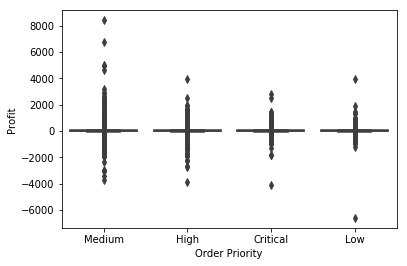

In [29]:
sns.boxplot("Order Priority", "Profit", data = df)

In [30]:
# There seem to be no direct relationship between Profit and the Order Priority.
# Still Medium priority Orders have had the highest profit at times depending on the product.

In [31]:
# 6. What is the distribution of customers Market wise?
df['Market'].value_counts()
numcustbymarket = pd.DataFrame({'CustCnt': df.groupby(['Market']).size()}).reset_index()
numcustbymarket

,Market,CustCnt
0,APAC,11002
1,Africa,4587
2,Canada,384
3,EMEA,5029
4,EU,10000
5,LATAM,10294
6,US,9994


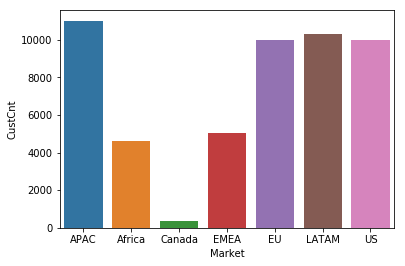

In [32]:
sns.barplot(x = 'Market', y = 'CustCnt', data = numcustbymarket)

In [35]:
# 7. What is the distribution of customers Market wise and Region wise

df['Region'].value_counts()


Central           11117
South              6645
EMEA               5029
North              4785
Africa             4587
Oceania            3487
West               3203
Southeast Asia     3129
East               2848
North Asia         2338
Central Asia       2048
Caribbean          1690
Canada              384
Name: Region, dtype: int64

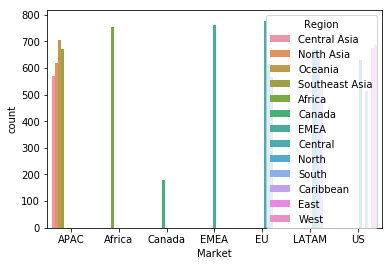

In [37]:
CustomersByMarketRegion = pd.DataFrame({'Count' : df.groupby(["Market","Region","Customer Name"]).size()}).reset_index()

sns.countplot("Market",
              hue= "Region", 
              data = CustomersByMarketRegion)

In [38]:
# Africa, EMEA and APAC are the top 3 largest markets
# APAC has the most regions that have most sales